<h1 align="center">Diabetes Data Analysis</h1>

All information regarding the features and dataset can be found in this research arcticle:
Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records

I have a family history of diabetes so I want to know how different features affect diabetes in general.
For this kernel, we will be using a diabetes readmission dataset to explore the different frameworks for model explainability


Machine learning models that can be used in the medical field should be interpretable.
Humans should know why these models decided on a conclusion.
The problem is the more complex an ML model gets the less interpretable it gets.
In this kernel we will examine techniques and frameworks in interpreting ML models.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Bad key text.latex.unicode in file D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.temp

In [2]:
# read the file and create a pandas dataframe
data = pd.read_csv('dataset/diabetic_data.csv')

In [3]:
# check the dimensions of the data
data.shape

(101766, 50)

In [4]:
# first 5 rows of data
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
#discribtion of numerical data
data[['time_in_hospital','num_lab_procedures','num_procedures','num_medications',
        'number_outpatient','number_emergency','number_inpatient',
        'number_diagnoses']].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
#no of unique patient
len(np.unique(data['patient_nbr']))

71518

In [7]:
#remove duplicate patient recods
data = data.drop_duplicates(subset = 'patient_nbr', keep = 'first')

Text(0, 0.5, 'Count')

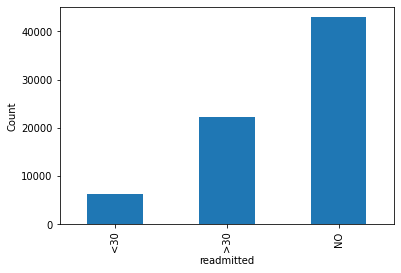

In [8]:
# the response variable 'readmitted' in the original dataset contains three categories.
# 11% of patients were readmitted within 30 days (<30)
# 35% of patients were readmitted after 30 days (>30)
# 54% of patients were never readmitted (NO)
data.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [9]:
data['readmitted'] = pd.Series([0 if val in ['NO', '>30'] else  val 
                         for val in data['readmitted']], index=data.index)
data['readmitted'] = pd.Series([1 if val in ['<30'] else  val 
                         for val in data['readmitted']], index=data.index)

In [10]:
#values counts of readmited column
data.readmitted.value_counts()

0    65225
1     6293
Name: readmitted, dtype: int64

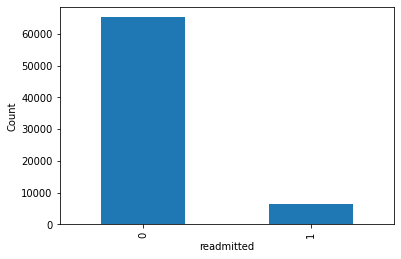

In [11]:
# the response variable 'readmitted' in the original dataset contains three categories.
# 11% of patients were readmitted within 30 days (<30)
# 35% of patients were readmitted after 30 days (>30)
# 54% of patients were never readmitted (NO)
data.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

In [12]:
# remove irrelevant features
data.drop(['encounter_id','patient_nbr', 'weight', 'payer_code','max_glu_serum','A1Cresult'], axis=1, inplace=True)

In [13]:
# remove rows that have NA in 'race', 'diag_1', 'diag_2', or 'diag_3' and 'gender'
# remove rows that have invalid values in 'gender'
data = data[data['race'] != '?']
data = data[data['diag_1'] != '?']
data = data[data['diag_2'] != '?']
data = data[data['diag_3'] != '?']
data = data[data['gender'] != 'Unknown/Invalid']

Text(0, 0.5, 'Count')

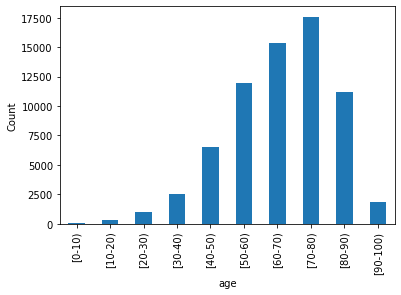

In [14]:
# check 'age' feature
data.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

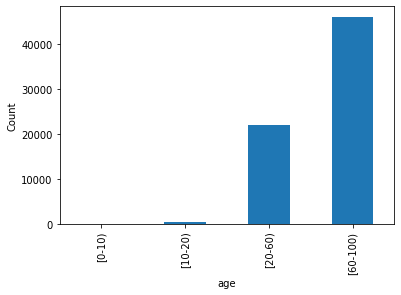

In [15]:
# Recategorize 'age' so that the population is more evenly distributed
data['age'] = pd.Series(['[20-60)' if val in ['[20-30)', '[30-40)', '[40-50)', '[50-60)'] else val 
                         for val in data['age']], index=data.index)
data['age'] = pd.Series(['[60-100)' if val in ['[60-70)','[70-80)','[80-90)', '[90-100)'] else val 
                         for val in data['age']], index=data.index)
data.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

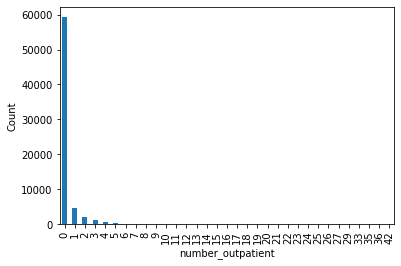

In [16]:
data.groupby('number_outpatient').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

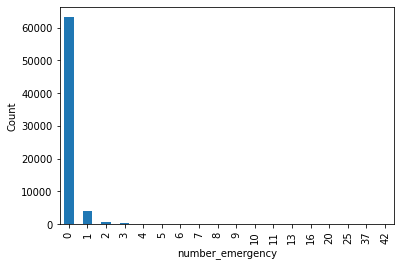

In [17]:
data.groupby('number_emergency').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

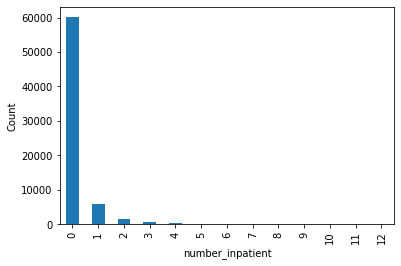

In [18]:
data.groupby('number_inpatient').size().plot(kind='bar')
plt.ylabel('Count')

In [19]:
# remove the other medications
data.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone','insulin'], axis=1, inplace=True)

In [20]:
# Recategorize 'age' so that the population is more evenly distributed
data['discharge_disposition_id'] = pd.Series(['Home' if val in [1] else val 
                         for val in data['discharge_disposition_id']], index=data.index)

data['discharge_disposition_id'] = pd.Series(['Anather' if val in [2,3,4,5,6] else val 
                         for val in data['discharge_disposition_id']], index=data.index)

data['discharge_disposition_id'] = pd.Series(['Expired' if val in [11,19,20,21] else val 
                         for val in data['discharge_disposition_id']], index=data.index)

data['discharge_disposition_id'] = pd.Series(['NaN' if val in [18,25,26] else val
                         for val in data['discharge_disposition_id']], index=data.index)
                        
data['discharge_disposition_id'] = pd.Series(['other' if val in [7,8,9,10,12,13,14,15,16,17,22,23,24,27,28,29,30] else val 
                         for val in data['discharge_disposition_id']], index=data.index)

In [21]:
# original 'admission_source_id' contains 25 levels
# reduce 'admission_source_id' into 3 categories
data['admission_source_id'] = pd.Series(['Emergency Room' if val == 7 else 'Referral' if val in [1,2,3] else 
                                         'NaN' if val in [15,17,20,21] else 'Other source' 
                                              for val in data['admission_source_id']], index=data.index)

In [22]:
# original 'admission_type_id' contains 8 levels
# reduce 'admission_type_id' into 2 categories
data['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other type' 
                                              for val in data['admission_type_id']], index=data.index)

In [23]:
# Extract codes related to heart disease
data = data.loc[data['diag_1'].isin(['410','411','412','413','414','415','420','421','422','423','424','425','426','427','428','429','430']) | data['diag_2'].isin(['410','411','412','413','414','415','420','421','422','423','424','425','426','427','428','429','430']) | data['diag_3'].isin(['410','411','412','413','414','415','420','421','422','423','424','425','426','427','428','429','430'])]


In [24]:
data.shape

(26703, 21)

In [25]:
import random
#create variable emergency visits
data['emergency_visits'] = [random.randint(0, 5) for _ in range(26703)]

In [26]:
#create variable emergency visits
data['acuity_of_admission'] = [random.randint(1, 5) for _ in range(26703)]

In [27]:
#create variable emergency visits
data['comorbidity'] = [random.randint(1, 15) for _ in range(26703)]

In [28]:
categarical_colmun=["age","race","gender","medical_specialty","change","diabetesMed","discharge_disposition_id","admission_source_id","admission_type_id","diag_1","diag_2","diag_3"]
dtypes = {c: 'category' for c in categarical_colmun}
data=data.astype(dtypes)

In [29]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,diag_1,diag_2,diag_3,number_diagnoses,change,diabetesMed,readmitted,emergency_visits,acuity_of_admission,comorbidity
5,Caucasian,Male,[20-60),Other type,Home,Referral,3,?,31,6,...,414,411,250,9,No,Yes,0,3,3,3
6,Caucasian,Male,[60-100),Other type,Home,Referral,4,?,70,1,...,414,411,V45,7,Ch,Yes,0,2,4,14
7,Caucasian,Male,[60-100),Emergency,Home,Emergency Room,5,?,73,0,...,428,492,250,8,No,Yes,0,1,4,1
8,Caucasian,Female,[60-100),Other type,Home,Other source,13,?,68,2,...,398,427,38,8,Ch,Yes,0,4,3,7
12,Caucasian,Female,[20-60),Emergency,Anather,Emergency Room,7,Family/GeneralPractice,60,0,...,428,250.43,250.6,8,Ch,Yes,1,4,3,12


In [30]:
# conver categarical variable into categary code
for i in categarical_colmun:
    data[i]=data[i].cat.codes

In [31]:
# apply square root transformation on right skewed count data to reduce the effects of extreme values.
# here log transformation is not appropriate because the data is Poisson distributed and contains many zero values.
data['number_outpatient'] = data['number_outpatient'].apply(lambda x: np.sqrt(x + 0.5))
data['number_emergency'] = data['number_emergency'].apply(lambda x: np.sqrt(x + 0.5))
data['number_inpatient'] = data['number_inpatient'].apply(lambda x: np.sqrt(x + 0.5))

In [32]:
# feature scaling, features are standardized to have zero mean and unit variance
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[feature_scale_cols])
data_scaler = scaler.transform(data[feature_scale_cols])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=data.index)
data.drop(feature_scale_cols, axis=1, inplace=True)
data = pd.concat([data, data_scaler_df], axis=1)

In [33]:
# create X (features) and y (response)
X = data.drop(['readmitted'], axis=1)
y = data['readmitted']

In [34]:
y.value_counts()

0    24236
1     2467
Name: readmitted, dtype: int64

#### Find Top Features in data

In [35]:
# split X and y into cross-validation (75%) and testing (25%) data sets
from sklearn.model_selection import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.25)

Top 10 features are: 
num_lab_procedures
diag_3
diag_2
num_medications
diag_1
comorbidity
time_in_hospital
emergency_visits
acuity_of_admission
medical_specialty


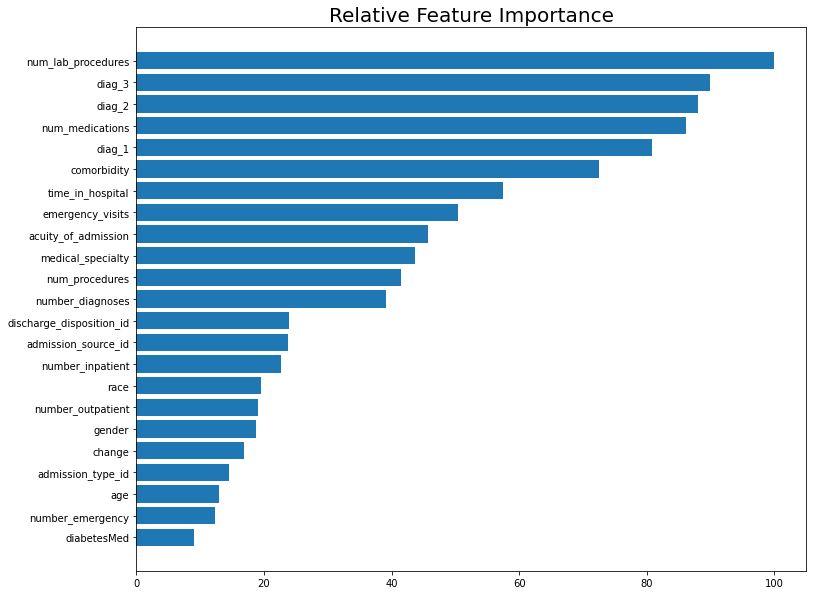

In [36]:
# fit Random Forest model to the cross-validation data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_cv, y_cv)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_cv.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print(feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

### Use over sampling method for handle imbalanace data

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from collections import Counter

In [38]:
#data Preparation
X1 = X
y1 = y
data = pd.concat([X,y], axis = 1)
df = Counter(y)
c = min(y, key=df.get)
d = [i for i,x in enumerate(y) if x == c]  #row index having rare class
d1 = [i for i,x in enumerate(y) if x != c]
Rare_Class_data = data.iloc[d]
Mejor_Class_data = data.iloc[d1]

### USING Over Sampling Methods

In [39]:
df = Rare_Class_data
a=Rare_Class_data.shape[0]
b = Mejor_Class_data.shape[0]
n = round(b/a)
sm = SMOTE(random_state=12)
rf =  RandomForestClassifier()

acc1=0
acc2=0

In [40]:
for i in range(1,n):
    df1 = Rare_Class_data.copy()
    df = data.append(df1)
    data = df
    n=df.shape[1]
    X1=df.iloc[:,1:(n-2)]
    y1=df.iloc[:,(n-1)]
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = .3,random_state=i)
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    rf.fit(X_train_res, y_train_res)
    y_pred = rf.predict(X_test)
    acc1 = rf.score(X_test, y_test)

In [41]:
# Acccuracy
acc1    

0.9993184296619411

In [42]:
# cohen kappa score
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.9986366725965338

In [43]:
#Classification Score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7255
           1       1.00      1.00      1.00      7417

    accuracy                           1.00     14672
   macro avg       1.00      1.00      1.00     14672
weighted avg       1.00      1.00      1.00     14672



### Random Forest 

In [44]:
#Random over sampling method
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc2 = rf.score(X_test, y_test)
print(acc2)

0.9989094874591058


In [45]:
print(cohen_kappa_score(y_test, y_pred))

0.9978186564528685


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7255
           1       1.00      1.00      1.00      7417

    accuracy                           1.00     14672
   macro avg       1.00      1.00      1.00     14672
weighted avg       1.00      1.00      1.00     14672



In [47]:
## KNN